<a href="https://colab.research.google.com/github/deepak-dewani/Data-Structures-and-Algorithms-in-Python/blob/main/02_python_binary_search_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('python-binary-search-trees')
jovian.set_colab_id('1biP5eeyhYOZ7f4AcOLa1kJAXRQGf-OnQ')

# Binary Search Trees, Traversals and Balancing in Python

### Part 2 of "Data Structures and Algorithms in Python"

![](https://i.imgur.com/lVqP63n.png)





[Data Structures and Algorithms in Python](https://jovian.ai/learn/data-structures-and-algorithms-in-python) is a beginner-friendly introduction to common data structures (linked lists, stacks, queues, graphs) and algorithms (search, sorting, recursion, dynamic programming) in Python, designed to help you prepare for coding interviews and assessments.


Earn a verified certificate of accomplishment for this course by signing up here: http://pythondsa.com.

Ask questions, get help & participate in discussions on the community forum: https://jovian.ai/forum/c/data-structures-and-algorithms-in-python/78

### Prerequisites

This course assumes very little background in programming and mathematics, and you can learn the required concepts here:

- Basic programming with Python ([variables](https://jovian.ai/aakashns/first-steps-with-python), [data types](https://jovian.ai/aakashns/python-variables-and-data-types), [loops](https://jovian.ai/aakashns/python-branching-and-loops), [functions](https://jovian.ai/aakashns/python-functions-and-scope) etc.)
- Some high school mathematics ([polynomials](https://www.youtube.com/watch?v=Vm7H0VTlIco), [vectors, matrices](https://www.youtube.com/watch?v=0oGJTQCy4cQ&list=PLSQl0a2vh4HCs4zPpOEdF2GuydqS90Yb6) and [probability](https://www.youtube.com/watch?v=uzkc-qNVoOk))
- No prior knowledge of data structures or algorithms is required

We'll cover any additional mathematical and theoretical concepts we need as we go along.



## How to Run the Code

The best way to learn the material is to execute the code and experiment with it yourself. This tutorial is an executable [Jupyter notebook](https://jupyter.org). You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.


## Problem 


In this notebook, we'll focus on solving the following problem:

> **QUESTION 1**: As a senior backend engineer at Jovian, you are tasked with developing a fast in-memory data structure to manage profile information (username, name and email) for 100 million users. It should allow the following operations to be performed efficiently:
> 
> 1. **Insert** the profile information for a new user.
> 2. **Find** the profile information of a user, given their username
> 3. **Update** the profile information of a user, given their usrname
> 5. **List** all the users of the platform, sorted by username
>
> You can assume that usernames are unique. 

Along the way, we will also solve several other questions related to binary trees and binary search trees that are often asked in coding interviews and assessments. 

## The Method


Here's a systematic strategy we'll apply for solving problems:

1. State the problem clearly. Identify the input & output formats.
2. Come up with some example inputs & outputs. Try to cover all edge cases.
3. Come up with a correct solution for the problem. State it in plain English.
4. Implement the solution and test it using example inputs. Fix bugs, if any.
5. Analyze the algorithm's complexity and identify inefficiencies, if any.
6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.



## 1. State the problem clearly. Identify the input & output formats.

#### Problem

> We need to create a data structure which can store 100 million records and perform insertion, search, update and list operations efficiently.

#### Input

The key inputs to our data structure are user profiles, which contain the username, name and email of a user. 

A Python _class_ would be a great way to represent the information for a user. A class is a blueprint for creating _objects_. Everything in Python is an _object_ belonging to some _class_. Here's the simples possible class in Python, with nothing in it:

In [ ]:
class User:
    pass

We can create or _instantiate_ an object of the class by calling it like a function.

In [ ]:
user1 = User()

We can verify that the object is of the class `User`.

In [ ]:
user1

In [ ]:
type(user1)

__main__.User

The object `user1` does not contain any useful information. Let's add a _constructor method_ to the class to store some _attributes_ or _properties_.

In [ ]:
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
        print('User created!')

We can now create an object with some properties.

In [ ]:
user2 = User('john', 'John Doe', 'john@doe.com')

User created!


In [ ]:
user195 = User('deepak', 'Deepak', 'deepak@dee.com')

User created!


In [ ]:
user195.name

'Deepak'

In [ ]:
user195.username

'deepak'

In [ ]:
user195.email

'deepak@dee.com'

In [ ]:
user195

In [ ]:
user2

Here's what's happening above (conceptually):

- Python creates an empty object of the type user and stores in the variable `user2`
- Python then invokes the function `User.___init__` with the arguments `user2`, `"john"`, `"John Doe"` and `"john@doe.com"`
- As the `__init__` function is executed, the properties `username`, `name` and `email` are set on the object `user2`


We can access the properties of the object using the `.` notation.

In [ ]:
user2.name

'John Doe'

In [ ]:
user2.email, user2.username

('john@doe.com', 'john')

You can also define custom methods inside a class.

In [ ]:
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
    
    def introduce_yourself(self, guest_name):
        print(f"Hi {guest_name}, I'm {self.name}! Contact me at {self.email} .")

In [ ]:
user3 = User('jane', 'Jane Doe', 'jane@doe.com')

In [ ]:
user3.introduce_yourself('David')

Hi David, I'm Jane Doe! Contact me at jane@doe.com .


When we try to invoke the method `user3.introduce_yourself`, the object `user3` is automatically passed as the first argument `self`. Indeed, the following statement is equivalent to the above statement.

In [ ]:
User.introduce_yourself(user3, 'David')

Hi David, I'm Jane Doe! Contact me at jane@doe.com .


Finally, we'll define a couple of helper methods to display user objects nicely within Jupyter.

In [ ]:
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
        
    def __repr__(self):
        return "User(username='{}', name='{}', email='{}')".format(self.username, self.name, self.email)
    
    def __str__(self):
        return self.__repr__()

In [ ]:
user4 = User('jane', 'Jane Doe', 'jane@doe.com')

In [ ]:
user4

User(username='jane', name='Jane Doe', email='jane@doe.com')

**Exercise:** What is the purpose of defining the functions `__str__` and `__repr__` within a class? How are the two functions different? Illustrate with some examples using the empty cells below.


Learn more about classes in Python here: https://jovian.ai/aakashns/python-classes-and-linked-lists .

The __str__ function is supposed to return a human-readable format, which is good for logging or to display some information about the object. Whereas, the __repr__ function is supposed to return an “official” string representation of the object, which can be used to construct the object again. Let’s look at some examples below to understand this difference in a better way.

In [ ]:
class car():
  def __init__(self,car_name, car_model, car_number):
    self.name = car_name
    self.model = car_model
    self.number = car_number

  def __repr__(self):
    return f"Car is {self.name} and its model is {self.model}, where number is {self.number}"

  def __str__(self):
    return self.__repr__
  
  


p = car('Toyota', 'Fortuner', 4566)

print(p.__repr__())
print(p.__str__())

Car is Toyota and its model is Fortuner, where number is 4566
<bound method car.__repr__ of Car is Toyota and its model is Fortuner, where number is 4566>


In [ ]:
class Person:

    def __init__(self, person_name, person_age):
        self.name = person_name
        self.age = person_age

    def __repr__(self):
        return f'Person(name={self.name}, age={self.age})'

    def __str__(self):
      return self.__repr__


p = Person('Pankaj', 34)

print(p.__repr__())
print(p.__str__())

Person(name=Pankaj, age=34)
<bound method Person.__repr__ of Person(name=Pankaj, age=34)>


#### Output

We can also express our desired data structure as a Python class `UserDatabase` with four methods: `insert`, `find`, `update` and `list_all`. 

In [ ]:
class UserDatabase:
    def insert(self, user):
        pass
    
    def find(self, username):
        pass
    
    def update(self, user):
        pass
        
    def list_all(self):
        pass

It's good programming practice to list out the signatures of different class functions before we actually implement the class.

## 2. Come up with some example inputs & outputs. 

Let's create some sample user profiles that we can use to test our functions once we implement them.

In [ ]:
aakash = User('aakash', 'Aakash Rai', 'aakash@example.com')
biraj = User('biraj', 'Biraj Das', 'biraj@example.com')
hemanth = User('hemanth', 'Hemanth Jain', 'hemanth@example.com')
jadhesh = User('jadhesh', 'Jadhesh Verma', 'jadhesh@example.com')
siddhant = User('siddhant', 'Siddhant Sinha', 'siddhant@example.com')
sonaksh = User('sonaksh', 'Sonaksh Kumar', 'sonaksh@example.com')
vishal = User('vishal', 'Vishal Goel', 'vishal@example.com')

In [ ]:
users = [aakash, biraj, hemanth, jadhesh, siddhant, sonaksh, vishal]

We can access different fields within a user profile object using the `.` (dot) notation.

In [ ]:
biraj.username, biraj.email, biraj.name

('biraj', 'biraj@example.com', 'Biraj Das')

We can also view a string representation of the object, since defined the `__repr__` and `__str__` methods

In [ ]:
print(aakash)

User(username='aakash', name='Aakash Rai', email='aakash@example.com')


In [ ]:
users

[User(username='aakash', name='Aakash Rai', email='aakash@example.com'),
 User(username='biraj', name='Biraj Das', email='biraj@example.com'),
 User(username='hemanth', name='Hemanth Jain', email='hemanth@example.com'),
 User(username='jadhesh', name='Jadhesh Verma', email='jadhesh@example.com'),
 User(username='siddhant', name='Siddhant Sinha', email='siddhant@example.com'),
 User(username='sonaksh', name='Sonaksh Kumar', email='sonaksh@example.com'),
 User(username='vishal', name='Vishal Goel', email='vishal@example.com')]

Since we haven't implemented our data structure yet, it's not possible to list sample outputs. However you can try to come up with different scenarios to test future implementations

**Exercise:** List some scenarios for testing the class methods `insert`, `find`, `update` and `list_all`.

1. Insert:
    1. Inserting into an empty database of users
    2. Trying to insert a user with a username that already exists
    3. Inserting a user with a username that does not exist
    4. Insering a user with data that already exist

2. Find:
    1. finding the particular username
    2. finding the user with their mail id 
    3. finding the user with the first name only

3. Update:
    1. updating the list with some changes in name of particular user
    2. updating their email
    3. updating their last name

4. List:
    1. list all the users
    2. list user within the specified range
    3. list user according to their mail id




## 3. Come up with a correct solution. State it in plain English.

Here's a simple and easy solution to the problem: we store the `User` objects in a list sorted by usernames. 

The various functions can be implemented as follows:

1. **Insert**: Loop through the list and add the new user at a position that keeps the list sorted.
2. **Find**: Loop through the list and find the user object with the username matching the query.
3. **Update**: Loop through the list, find the user object matching the query and update the details
4. **List**: Return the list of user objects.

We can use the fact usernames, which are are strings can be compared using the `<`, `>` and `==` operators in Python.

In [ ]:
'biraj' < 'hemanth'

True

## 4. Implement the solution and test it using example inputs.

The code for implementing the above solution is also fairly straightfoward.

In [ ]:
class UserDatabase:
    def __init__(self):
        self.users = []                 # Initiating the empty list, initially we have the empty list and we need to add the data of the user.
    
    def insert(self, user):
        i = 0
        while i < len(self.users):
            # Find the first username greater than the new user's username
            if self.users[i].username > user.username:
                break
            i += 1
        self.users.insert(i, user)
    
    def find(self, username):                     # Finding the particular user
        for user in self.users:
            if user.username == username:
              return user
    
    def update(self, user):                       # Finding the user need to be update, then updating the changes
        target = self.find(user.username)
        target.name, target.email = user.name, user.email
        
    def list_all(self):                           # Listing all the users
        return self.users

We can create a new database of users by _instantiating_ and object of the `UserDatabase` class.

In [ ]:
database = UserDatabase()

Let's insert some entires into the object.

In [ ]:
database.insert(hemanth)
database.insert(aakash)
database.insert(siddhant)

We can now retrieve the data for a user, given their username.

In [ ]:
user = database.find('siddhant')
user

User(username='siddhant', name='Siddhant Sinha', email='siddhant@example.com')

Let's try changing the information for a user

In [ ]:
database.update(User(username='siddhant', name='Siddhant U', email='siddhantu@example.com'))

In [ ]:
user = database.find('siddhant')
user

User(username='siddhant', name='Siddhant U', email='siddhantu@example.com')

Finally, we can retrieve a list of users in alphabetical order.

In [ ]:
database.list_all()

[User(username='aakash', name='Aakash Rai', email='aakash@example.com'),
 User(username='hemanth', name='Hemanth Jain', email='hemanth@example.com'),
 User(username='siddhant', name='Siddhant U', email='siddhantu@example.com')]

Let's verify that a new user is inserted into the correct position.

In [ ]:
database.insert(biraj)

In [ ]:
database.list_all()

[User(username='aakash', name='Aakash Rai', email='aakash@example.com'),
 User(username='biraj', name='Biraj Das', email='biraj@example.com'),
 User(username='hemanth', name='Hemanth Jain', email='hemanth@example.com'),
 User(username='siddhant', name='Siddhant U', email='siddhantu@example.com')]

The user `biraj` was inserted just before `hemanth`, as expected.

**Exercise:** Use the empty cells below to test the various scenarios you listed in step 2 above.

In [ ]:
user = database.find('aakash@example.com')
print(user)

None


In [ ]:
user = database.find('deepak')
user

## 5. Analyze the algorithm's complexity and identify inefficiencies

The operations `insert`, `find`, `update` involves iterating over a list of users, in the worst case, they may take up to `N` iterations to return a result, where `N` is the total number of users. `list_all` however, simply returns the existing internal list of users. 

Thus, the time complexities of the various operations are:

1. Insert: **O(N)**
2. Find: **O(N)**
3. Update: **O(N)**
4. List: **O(1)**

**Exercise:** Verify that the space complexity of each operation is **O(1)**.

Is this good enough? To get a sense how long each function might take if there are 100 million users on the platform, we can simply run an `for` or `while` loop on 10 million numbers.

In [ ]:
%%time
for i in range(100000000):
    j = i*i

CPU times: user 11.3 s, sys: 5.41 ms, total: 11.3 s
Wall time: 11.3 s


It takes almost 10 seconds to execute all the iterations in the above cell. 

* A 10-second delay for fetching user profiles will lead to a suboptimal users experience and may cause many users to stop using the platform altogether. 
* The 10-second processing time for each profile request will also significantly limit the number of users that can access the platform at a time or increase the cloud infrastructure costs for the company by millions of dollars.

As a senior backend engineer, you must come up with a more efficient data structure! Choosing the right data structure for the requirements at hand is an important skill. It's apparent that a sorted list of users might not be the best data structure to organize profile information for millions of users. 

### Save and upload your work to Jovian

Whether you're running this Jupyter notebook online or on your computer, it's essential to save your work from time to time. You can continue working on a saved notebook later or share it with friends and colleagues to let them execute your code. [Jovian](https://jovian.ai/platform-features) offers an easy way of saving and sharing your Jupyter notebooks online.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
jovian.commit(project='python-binary-search-trees')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deepak-dewani/python-binary-search-trees


'https://jovian.ai/deepak-dewani/python-binary-search-trees'

## 6. Apply the right technique to overcome the inefficiency

We can limit the number of iterations required for common operations like find, insert and update by organizing our data in the following structure, called a **binary tree**:

<img src="https://i.imgur.com/lVqP63n.png" width="520">



It's called a tree because it vaguely like an inverted tree trunk with branches. 
* The word "binary" indicates that each "node" in the tree can have at most 2 children (left or right). 
* Nodes can have 0, 1 or 2 children. Nodes that do not have any children are sometimes also called "leaves".
* The single node at the top is called the "root" node, and it typically where operations like search, insertion etc. begin.

<img src="https://i.imgur.com/TZHMKJr.png" width="400">


## Balanced Binary Search Trees

<img src="https://i.imgur.com/Mqef5b3.png" width="520">

For our use case, we require the binary tree to have some additional properties:

1. **Keys and Values**: Each node of the tree stores a key (a username) and a value (a `User` object). Only keys are shown in the picture above for brevity. A binary tree where nodes have both a key and a value is often referred to as a **map** or **treemap** (because it maps keys to values).
2. **Binary Search Tree**: The *left subtree* of any node only contains nodes with keys that are lexicographically smaller than the node's key, and the *right subtree* of any node only contains nodes with keys that lexicographically larger than the node's key. A tree that satisfies this property is called a **binary search trees**, and it's easy to locate a specific key by traversing a single path down from the root note.
3. **Balanced Tree**: The tree is **balanced** i.e. it does not skew too heavily to one side or the other. The left and right subtrees of any node shouldn't differ in height/depth by more than 1 level.


### Height of a Binary Tree

The number of levels in a tree is called its height. As you can tell from the picture above, each level of a tree contains twice as many nodes as the previous level. 

For a tree of height `k`, here's a list of the number of nodes at each level:

Level 0: `1`

Level 1: `2`

Level 2: `4` i.e. `2^2`

Level 3: `8` i.e. `2^3`

...

Level k-1: `2^(k-1)`

If the total number of nodes in the tree is `N`, then it follows that

```
N = 1 + 2^1 + 2^2 + 2^3 + ... + 2^(k-1)
```


We can simplify this equation by adding `1` on each side:

```
N + 1 = 1 + 1 + 2^1 + 2^2 + 2^3 + ... + 2^(k-1) 

N + 1 = 2^1 + 2^1 + 2^2+ 2^3 + ... + 2^(k-1) 

N + 1 = = 2^2 + 2^2 + 2^3 + ... + 2^(k-1)

N + 1 = = 2^3 + 2^3 + ... + 2^(k-1)

...

N + 1 = 2^(k-1) + 2^(k-1)

N + 1 = 2^k

k = log(N + 1) <= log(N) + 1 

```

Thus, to store `N` records we require a balanced binary search tree (BST) of height no larger than `log(N) + 1`. This is a very useful property, in combination with the fact that nodes are arranged in a way that makes it easy to find a specific key by following a single path down from the root. 

As we'll see soon, the `insert`, `find` and `update` operations in a balanced BST have time complexity `O(log N)` since they all involve traversing a single path down from the root of the tree.

## Binary Tree

> **QUESTION 2**: Implement a binary tree using Python, and show its usage with some examples.

To begin, we'll create simple binary tree (without any of the additional properties) containing numbers as keys within nodes. Here's an example:

<img src="https://i.imgur.com/hg2ZG5h.png" width="240">

Here's a simple class representing a node within a binary tree.


In [ ]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

Let's create objects representing each node of the above tree

In [ ]:
node0 = TreeNode(3)
node1 = TreeNode(4)
node2 = TreeNode(5)

Let's verify that `node0` is an object of the type `TreeNode` and has the property `key` set to `3`.

In [ ]:
node0

In [ ]:
node0.key

3

We can *connect* the nodes by setting the `.left` and `.right` properties of the root node.

In [ ]:
node0.left = node1
node0.right = node2

And we're done! We can create a new variable *tree* which simply points to the root node, and use it to access all the nodes within the tree.

<img src="https://i.imgur.com/hg2ZG5h.png" width="240">

In [ ]:
tree = node0

In [ ]:
tree.key

3

In [ ]:
tree.left.key

4

In [ ]:
tree.right.key

5

Going forward, we'll use the term "tree" to refer to the root node. The term "node" can refer to any node in a tree, not necessarily the root.

**Exercise:** Create the following binary tree using the `TreeNode` class defined above.

<img src="https://i.imgur.com/d7djJAf.png" width="540">

In [ ]:
class TreeNode1:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

In [ ]:
node2 = TreeNode1(2)
node3 = TreeNode1(3)
node5 = TreeNode1(5)
node1 = TreeNode1(1)
nodel3 = TreeNode1(3)
nodel7 = TreeNode1(7)
nodel4 = TreeNode1(4)
nodel6 = TreeNode1(6)
nodel8 = TreeNode1(8)

In [ ]:
node2.left = node3
node2.right = node5
node2.left.left = node1
node2.right.left = nodel3
node2.right.right = nodel7
node2.right.left.right = nodel4
node2.right.right.left = nodel6
node2.right.right.right = nodel8

In [ ]:
tree = node2

In [ ]:
tree.key


2

In [ ]:
tree.left.left.key

1

In [ ]:
tree.right.right.left.key

6

In [ ]:
tree.right.right.right.key

8

It's a bit inconvenient to create a tree by manually connecting all the nodes. Let's write a helper function which can convert a tuple with the structure `( left_subtree, key, right_subtree)` (where `left_subtree` and `right_subtree` are themselves tuples) into binary tree.

Here's an tuple representing the tree shown above:

In [ ]:
tree_tuple = ((1,3,None), 2, ((None, 3, 4), 5, (6, 7, 8)))

In [ ]:
def parse_tuple(data):
    print(data)
    if isinstance(data, tuple) and len(data) == 3:
        node = TreeNode(data[1])
        node.left = parse_tuple(data[0])
        node.right = parse_tuple(data[2])
    elif data is None:
        node = None
    else:
        node = TreeNode(data)
    return node

The `parse_tuple` creates a new root node when a tuple of size 3 as an the input. Interestingly, to create the left and right subtrees for the node, the `parse_tuple` function invokes itself. This technique is called _recursion_. The chain of _recursive_ calls ends when `parse_tuple` encounters a number or `None` as input. We'll use recursion extensively throughout this tutorial.


**Exercise:** Add print statements inside `parse_tuple` to display the arguments for each call of the function. Does the sequence of recursive calls make sense to you?


Let's try out `parse_tuple` with the tuple define earlier.

In [ ]:
tree2 = parse_tuple(((1,3,None), 2, ((None, 3, 4), 5, (6, 7, 8))))

((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))
(1, 3, None)
1
None
((None, 3, 4), 5, (6, 7, 8))
(None, 3, 4)
None
4
(6, 7, 8)
6
8


In [ ]:
tree2

We can now examine the tree to verify that it was constructed as expected.

<img src="https://i.imgur.com/d7djJAf.png" width="540">

In [ ]:
tree2.key

2

In [ ]:
tree2.left.key, tree2.right.key

(3, 5)

In [ ]:
tree2.left.left.key, tree2.left.right, tree2.right.left.key, tree2.right.right.key

(1, None, 3, 7)

In [ ]:
tree2.right.left.right.key, tree2.right.right.left.key, tree2.right.right.right.key

(4, 6, 8)

**Exercise:** Define a function `tree_to_tuple` that converts a binary tree into a tuple representing the same tree. E.g. `tree_to_tuple` converts the tree created above to the tuple `((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))`. *Hint*: Use recursion.

In [ ]:
def tree_to_tuple(tree2):
  # print(tree2)
  if tree2 is None:
    return None
  if tree2.left is None and tree2.right is None:
    return tree2.key
  return tree_to_tuple(tree2.left), tree2.key, tree_to_tuple(tree2.right)


In [ ]:
tree = tree_to_tuple(tree2)
tree

((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

Let's create another helper function to display all the keys in a tree-like structure for easier visualization.

In [ ]:
def display_keys(node, space='\t', level=0):
    # print(node.key if node else None, level)
    
    # If the node is empty
    if node is None:
        print(space*level + '∅')
        return   
    
    # If the node is a leaf 
    if node.left is None and node.right is None:
        print(space*level + str(node.key))
        return
    
    # If the node has children
    display_keys(node.right, space, level+1)
    print(space*level + str(node.key))
    display_keys(node.left,space, level+1)    

Once again, the `display_keys` function users recursion to print all the keys of the left and right subtree with proper indentation.

**Exercise:** Add print statements inside `display_keys` to display the arguments for each call of the function. Does the sequence of recursive calls make sense to you?

Let's try using the function.

In [ ]:
display_keys(tree2, '  ')

      8
    7
      6
  5
      4
    3
      ∅
2
    ∅
  3
    1


We can now visualize the tree that was just created (albeit rotated by 90 degrees). It's easy to see that it matches the expected structure.

<img src="https://i.imgur.com/d7djJAf.png" width="540">

**Exercise**: Create some more trees and visualize them using `display_keys`. You can use [excalidraw.com](https://excalidraw.com) as a digital whiteboard to create trees.

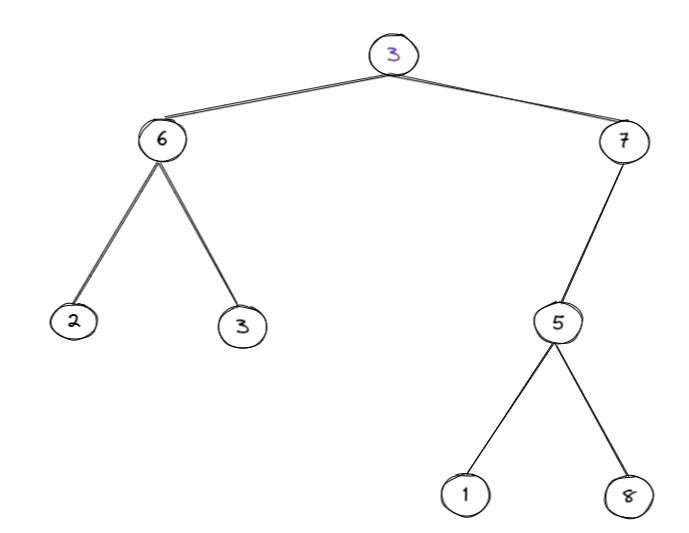


In [ ]:
class Treepractice:
  def __init__(self, key):
    self.key = key
    self.left = None
    self.right = None

node3 = Treepractice(3)
node6 = Treepractice(6)
node7 = Treepractice(7)
node2 = Treepractice(2)
nodel3 = Treepractice(3)
node5 = Treepractice(5)
node1 = Treepractice(1)
node8 = Treepractice(8)


node3.left = node6
node3.right = node7
node3.left.left = node2
node3.left.right = nodel3
node3.right.left = node5
node3.right.left.left = node1
node3.right.left.right = node8


def parse_tuple(data):
  print(data)
  if isinstance(data, tuple) and len(data) == 3:
    node = Treepractice(data[1])
    node.left = parse_tuple(data[0])
    node.right = parse_tuple(data[2])
  elif data is None:
    node = None
  else:
    node = Treepractice(data)
  return node


def tree_to_tuple(tree2):
  # print(tree2)
  if tree2 is None:
    return None
  elif tree2.left is None and tree2.right is None:
    return tree2.key
  return tree_to_tuple(tree2.left), tree2.key, tree_to_tuple(tree2.right)

In [118]:
tree_to_tuple(mytree)

((2, 6, 3), 3, ((1, 5, 8), 7, None))

In [119]:
display_keys(mytree)

		∅
	7
			8
		5
			1
3
		3
	6
		2


## Traversing a Binary Tree

The following questions are frequently asked in coding interviews and assessments:

> **QUESTION 3**: Write a function to perform the _inorder_ traversal of a binary tree.

> **QUESTION 4**: Write a function to perform the _preorder_ traversal of a binary tree.

> **QUESTION 5**: Write a function to perform the _postorder_ traversal of a binary tree.

A *traversal* refers to the process of visiting each node of a tree exactly once. _Visiting a node_ generally refers to adding the node's key to a list. There are three ways to traverse a binary tree and return the list of visited keys: 

### Inorder traversal



  1. Traverse the left subtree recursively inorder.
  2. Traverse the current node.
  3. Traverse the right subtree recursively inorder.


<img src="https://i.imgur.com/KCXpMA9.png" width="540">


### Preorder traversal

  1. Traverse the current node.
  2. Traverse the left subtree recursively preorder.
  3. Traverse the right subtree recursively preorder.
  
<img src="https://i.imgur.com/2xrMUWP.png" width="540">


Can you guess how **postorder** traversal works??


Here's an implementation of inorder traversal of a binary tree.

In [ ]:
def traverse_in_order(node):
    if node is None: 
        return []
    return(traverse_in_order(node.left) + 
           [node.key] + 
           traverse_in_order(node.right))

Let's try it out with this tree:

<img src="https://i.imgur.com/d7djJAf.png" width="540">

In [ ]:
tree = parse_tuple(((1,3,None), 2, ((None, 3, 4), 5, (6, 7, 8))))

((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))
(1, 3, None)
1
None
((None, 3, 4), 5, (6, 7, 8))
(None, 3, 4)
None
4
(6, 7, 8)
6
8


In [ ]:
display_keys(tree, '  ')

      8
    7
      6
  5
      4
    3
      ∅
2
    ∅
  3
    1


In [ ]:
traverse_in_order(tree)

[1, 3, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
def transverse_pre_order(node):
  if node is None:
    return []
  return ( [node.key] +
          transverse_pre_order(node.left) + 
          transverse_pre_order(node.right))

In [ ]:
transverse_pre_order(tree)

[2, 3, 1, 5, 3, 4, 7, 6, 8]

In [ ]:
def transverse_post_order(node):
  if node is None:
    return []
  return ( transverse_post_order(node.left) + 
          transverse_post_order(node.right) +
          [node.key])

In [ ]:
transverse_post_order(tree)

[1, 3, 4, 3, 6, 8, 7, 5, 2]


**Exercise:** Implement functions for preorder and postorder traversal of a binary tree.

Test your implementations by making submissions to the following problems:

* https://leetcode.com/problems/binary-tree-inorder-traversal/
* https://leetcode.com/problems/binary-tree-preorder-traversal/
* https://leetcode.com/problems/binary-tree-postorder-traversal/

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deepak-dewani/python-binary-search-trees


'https://jovian.ai/deepak-dewani/python-binary-search-trees'

## Height and Size of a Binary Tree


> **QUESTION 6**: Write a function to calculate the height/depth of a binary tree

> **QUESTION 7**: Write a function to count the number of nodes in a binary tree


The _height/depth_ of a binary tree is defined as the length of the longest path from its root node to a leaf. It can be computed recursively, as follows:


In [ ]:
def tree_height(node):
    if node is None:
        return 0
    return 1 + max(tree_height(node.left), tree_height(node.right))

Let's compute the height of this tree:

<img src="https://i.imgur.com/d7djJAf.png" width="540">

In [ ]:
tree_height(tree)

4

Here's a function to count the number of nodes in a binary tree.

In [ ]:
def tree_size(node):
    if node is None:
        return 0
    return 1 + tree_size(node.left) + tree_size(node.right)

In [ ]:

tree_size(tree)

9

**Exercise:** Try solving these problems relating to path lengths in a binary tree:

* https://leetcode.com/problems/maximum-depth-of-binary-tree/
* https://leetcode.com/problems/minimum-depth-of-binary-tree/
* https://leetcode.com/problems/diameter-of-binary-tree/

As a final step, let's compile all the functions we've written so far as methods withing the `TreeNode` class itself. Encapsulation of data and functionality within the same class is a good programming practice.

In [ ]:
class TreeNode():
    def __init__(self, key):
        self.key, self.left, self.right = key, None, None
    
    def height(self):
        if self is None:
            return 0
        return 1 + max(TreeNode.height(self.left), TreeNode.height(self.right))
    
    def size(self):
        if self is None:
            return 0
        return 1 + TreeNode.size(self.left) + TreeNode.size(self.right)

    def traverse_in_order(self):
        if self is None: 
            return []
        return (TreeNode.traverse_in_order(self.left) + 
                [self.key] + 
                TreeNode.traverse_in_order(self.right))
    
    def display_keys(self, space='\t', level=0):
        # If the node is empty
        if self is None:
            print(space*level + '∅')
            return   

        # If the node is a leaf 
        if self.left is None and self.right is None:
            print(space*level + str(self.key))
            return

        # If the node has children
        display_keys(self.right, space, level+1)
        print(space*level + str(self.key))
        display_keys(self.left,space, level+1)    
    
    def to_tuple(self):
        if self is None:
            return None
        if self.left is None and self.right is None:
            return self.key
        return TreeNode.to_tuple(self.left),  self.key, TreeNode.to_tuple(self.right)
    
    def __str__(self):
        return "BinaryTree <{}>".format(self.to_tuple())
    
    def __repr__(self):
        return "BinaryTree <{}>".format(self.to_tuple())
    
    @staticmethod    
    def parse_tuple(data):
        if data is None:
            node = None
        elif isinstance(data, tuple) and len(data) == 3:
            node = TreeNode(data[1])
            node.left = TreeNode.parse_tuple(data[0])
            node.right = TreeNode.parse_tuple(data[2])
        else:
            node = TreeNode(data)
        return node

The class method invocations `TreeNode.height(node)` and `node.height()` are equivalent. Can you guess why we're using the former in the function definitions above? Hint: Track the recursive calls. Discuss on the forum: https://jovian.ai/forum/c/data-structures-and-algorithms-in-python/lesson-2/82

Let's try out the various methods defined above for this tree:

<img src="https://i.imgur.com/d7djJAf.png" width="540">

In [ ]:
tree_tuple

((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

In [ ]:
tree = TreeNode.parse_tuple(tree_tuple)

In [ ]:
tree

BinaryTree <((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))>

In [ ]:
tree.display_keys('  ')

      8
    7
      6
  5
      4
    3
      ∅
2
    ∅
  3
    1


In [ ]:
tree.height()

4

In [ ]:
tree.size()

9

In [ ]:
tree.traverse_in_order()

[1, 3, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
tree.to_tuple()

((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

**Exercise:** Create some more trees and try out the operations defined above. Add more operations to the `TreeNode` class.

In [ ]:
class Treenode():
  def __init__(self, key):
    self.key = key
    self.left = None
    self.right = None

  def tree_height(self):
    if self is None:
      return 0
    return 1 + max(tree_height(self.left), tree_height(self.right))

  def tree_size(self):
    if self is None:
      return 0
    return 1 + (tree_size(self.left) + tree_size(self.right))

  def tranverse_inorder(self):
    if self is None:
      return []
    return (transverse_inorder(self.left) + [self.key] + transverse_inorder(self.right))

  def tranverse_preorder(self):
    if self is None:
      return []
    return ([self.key] + transverse_preorder(self.left) + transverse_preorder(self.right))

  def tranverse_postorder(self):
    if self is None:
      return []
    return (transverse_postorder(self.left) + transverse_postorder(self.right) + [self.key])

  def display_keys(self, space='\t', level=0):
      # print(self.key if self else None, level)
    
      # If the self is empty
    if self is None:
      print(space*level + '∅')
      return   
    
    # If the self is a leaf 
    if self.left is None and self.right is None:
      print(space*level + str(self.key))
      return
    
    # If the self has children
    display_keys(self.right, space, level+1)
    print(space*level + str(self.key))
    display_keys(self.left,space, level+1) 

  def tree_to_tuple(self):
    # print(self)
    if self is None:
      return None
    elif self.left is None and self.right is None:
      return self.key
    return tree_to_tuple(self.left), self.key, tree_to_tuple(self.right)

  def __str__(self):
    return f"Binary tree is {self.tree_to_tuple()}."

  def __repr__(self):
    return f"Binary Tree is {self.tree_to_tuple()}"



  @staticmethod
  def parse_tuple(data):
    #print(data)
    if isinstance(data, tuple) and len(data)==3:
      node = Treenode(data[1])
      node.left = parse_tuple(data[0])
      node.right = parse_tuple(data[2])
    elif data is None:
      node = None
    else:
      node = Treenode(data)
    return node


In [ ]:
tree_to_tuple(mytree)

((2, 6, 3), 3, ((1, 5, 8), 7, None))

In [ ]:
myheight = Treenode.tree_height(mytree)
myheight

4

In [ ]:
mysize = Treenode.tree_size(mytree)
mysize

8

In [ ]:
transverse_in_order(mytree)

[2, 6, 3, 3, 1, 5, 8, 7]

In [ ]:
transverse_pre_order(mytree)

[3, 6, 2, 3, 7, 5, 1, 8]

In [ ]:
transverse_post_order(mytree)

[2, 3, 6, 1, 8, 5, 7, 3]

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deepak-dewani/python-binary-search-trees


'https://jovian.ai/deepak-dewani/python-binary-search-trees'

## Binary Search Tree (BST)

A binary search tree or BST is a binary tree that satisfies the following conditions:

1. The left subtree of any node only contains nodes with keys less than the node's key
2. The right subtree of any node only contains nodes with keys greater than the node's key

It follows from the above conditions that every subtree of a binary search tree must also be a binary search tree.


> **QUESTION 8**: Write a function to check if a binary tree is a binary search tree (BST).

> **QUESTION 9**: Write a function to find the maximum key in a binary tree.

> **QUESTION 10**: Write a function to find the minimum key in a binary tree.


Here's a function that covers all of the above:

In [ ]:
def remove_none(nums):
    return [x for x in nums if x is not None]

def is_bst(node):
    if node is None:
        return True, None, None
    
    is_bst_l, min_l, max_l = is_bst(node.left)
    is_bst_r, min_r, max_r = is_bst(node.right)
    
    is_bst_node = (is_bst_l and is_bst_r and 
              (max_l is None or node.key > max_l) and 
              (min_r is None or node.key < min_r))
    
    min_key = min(remove_none([min_l, node.key, min_r]))
    max_key = max(remove_none([max_l, node.key, max_r]))
    
    # print(node.key, min_key, max_key, is_bst_node)
        
    return is_bst_node, min_key, max_key

The following tree is not a BST (because a node with the key 3 appears in the left subtree of a node with the key 2):

<img src="https://i.imgur.com/d7djJAf.png" width="540">

Let's verify this using `is_bst`.

In [ ]:
tree1 = TreeNode.parse_tuple(((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8))))

In [ ]:
is_bst(tree1)

On the other hand, the following tree is a BST:

<img src="https://i.imgur.com/JZeF9ix.png" width="520">

Let's create this tree and verify that it is a BST. Note that the `TreeNode` class also supports using strings as keys, as strings support the comparison operators `<` and `>` too.

In [ ]:
tree2 = TreeNode.parse_tuple((('aakash', 'biraj', 'hemanth')  , 'jadhesh', ('siddhant', 'sonaksh', 'vishal')))

In [ ]:
is_bst(tree2)

**Exercise:** Test the `is_bst` function with some more examples using the empty cells below.

## Storing Key-Value Pairs using BSTs

Recall that we need to store user objects with each key in our BST. Let's define new class `BSTNode` to represent the nodes of of our tree. Apart from having properties `key`, `left` and `right`, we'll also store a `value` and pointer to the parent node (for easier upward traversal).

In [ ]:
class BSTNode():
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.parent = None

Let's try to recreate this BST with usernames as keys and user objects as values:

<img src="https://i.imgur.com/JZeF9ix.png" width="520">

In [ ]:
# Level 0
tree = BSTNode(jadhesh.username, jadhesh)

In [ ]:
# View Level 0
tree.key, tree.value

In [ ]:
# Level 1
tree.left = BSTNode(biraj.username, biraj)
tree.right = BSTNode(sonaksh.username, sonaksh)

In [ ]:
# View Level 1
tree.left.key, tree.left.value, tree.right.key, tree.right.value

**Exercise:** Add the next layer of nodes to the tree and verify that they were added properly.

We can use the same `display_keys` function we defined earlier to visualize our tree.

In [ ]:
display_keys(tree)

### Insertion into BST


> **QUESTION 11**: Write a function to insert a new node into a BST.


We use the BST-property to perform insertion efficiently: 

1. Starting from the root node, we compare the key to be inserted with the current node's key
2. If the key is smaller, we recursively insert it in the left subtree (if it exists) or attach it as as the left child if no left subtree exists.
3. If the key is larger, we recursively insert it in the right subtree (if it exists) or attach it as as the right child if no right subtree exists.

Here's a recursive implementation of `insert`.

In [ ]:
def insert(node, key, value):
    if node is None:
        node = BSTNode(key, value)
    elif key < node.key:
        node.left = insert(node.left, key, value)
        node.left.parent = node
    elif key > node.key:
        node.right = insert(node.right, key, value)
        node.right.parent = node
    return node

Let's use this to recreate our tree.

<img src="https://i.imgur.com/JZeF9ix.png" width="520">

To create the first node, we can use the `insert` function with `None` as the target tree.

In [ ]:
tree = insert(None, jadhesh.username, jadhesh)

The remaining nodes can now be inserted into `tree`.

In [ ]:
insert(tree, biraj.username, biraj)
insert(tree, sonaksh.username, sonaksh)
insert(tree, aakash.username, aakash)
insert(tree, hemanth.username, hemanth)
insert(tree, siddhant.username, siddhant)
insert(tree, vishal.username, siddhant)

In [ ]:
display_keys(tree)

Perfect! The tree was created as expected. 

Note, however, that the order of insertion of nodes change the structure of the resulting tree.

In [ ]:
tree2 = insert(None, aakash.username, aakash)
insert(tree2, biraj.username, biraj)
insert(tree2, hemanth.username, hemanth)
insert(tree2, jadhesh.username, jadhesh)
insert(tree2, siddhant.username, siddhant)
insert(tree2, sonaksh.username, sonaksh)
insert(tree2, vishal.username, vishal)

In [ ]:
display_keys(tree2)

Can you see why the tree created above is skewed/unbalanced?

<img src="https://i.imgur.com/lP5Thct.png" width="520">

Skewed/unbalanced BSTs are problematic because the height of such trees often ceases to logarithmic compared to the number of nodes in the tree. For instance the above tree has 7 nodes and height 7.

The length of the path traversed by `insert` is equal to the height of the tree (in the worst case). It follows that if the tree is balanced, the time complexity of insertion is `O(log N)` otherwise it is `O(N)`.

In [ ]:
tree_height(tree2)

**Exercise:** Create some more balanced and unbalanced BSTs using the `insert` function defined above.

### Finding a Node in BST

> **QUESTION 11**: Find the value associated with a given key in a BST.

We can follow a recursive strategy similar to insertion to find the node with a given key within a BST.

In [ ]:
def find(node, key):
    if node is None:
        return None
    if key == node.key:
        return node
    if key < node.key:
        return find(node.left, key)
    if key > node.key:
        return find(node.right, key)

<img src="https://i.imgur.com/dzDszlw.png" width="520">

In [ ]:
node = find(tree, 'hemanth')

In [ ]:
node.key, node.value

The the length of the path followed by `find` is equal to the height of the tree (in the worst case). Thus it has a similar time complexity as `insert`.

**Example:** Try finding some more nodes from the BST created above (or create new trees).

### Updating a value in a BST

> **QUESTION 12:** Write a function to update the value associated with a given key within a BST

We can use `find` to locate the node to be updated, and simply update it's value.

In [ ]:
def update(node, key, value):
    target = find(node, key)
    if target is not None:
        target.value = value

In [ ]:
update(tree, 'hemanth', User('hemanth', 'Hemanth J', 'hemanthj@example.com'))

In [ ]:
node = find(tree, 'hemanth')
node.value

The value of the node was successfully updated. The time complexity of `update` is the same as that of `find`.

**Exercise:** Try some more update operations using the BST created earlier.

### List the nodes

> **QUESTION 13:** Write a function to retrieve all the key-values pairs stored in a BST in the sorted order of keys.

The nodes can be listed in sorted order by performing an inorder traversal of the BST.

In [ ]:
def list_all(node):
    if node is None:
        return []
    return list_all(node.left) + [(node.key, node.value)] + list_all(node.right)

In [ ]:
list_all(tree)

**Exercise:** Determine the time complexity and space complexity of `list_all`.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Balanced Binary Trees

> **QUESTION 14**: Write a function to determine if a binary tree is balanced.

Here's a recursive strategy:

1. Ensure that the left subtree is balanced.
2. Ensure that the right subtree is balanced.
3. Ensure that the difference between heights of left subtree and right subtree is not more than 1.



In [ ]:
def is_balanced(node):
    if node is None:
        return True, 0
    balanced_l, height_l = is_balanced(node.left)
    balanced_r, height_r = is_balanced(node.right)
    balanced = balanced_l and balanced_r and abs(height_l - height_r) <=1
    height = 1 + max(height_l, height_r)
    return balanced, height

The following tree is balanced:

<img src="https://i.imgur.com/JZeF9ix.png" width="520">

In [ ]:
is_balanced(tree)

The following tree is not balanced:

<img src="https://i.imgur.com/lP5Thct.png" width="520">

In [ ]:
is_balanced(tree2)

**Exercise:** Is the tree shown below balanced? Why or why not? Create this tree and check if it's balanced using the `is_balanced` function.

<img src="https://i.imgur.com/LlOT712.png" width="520">



Also try this related problem on *complete* binary trees: https://leetcode.com/problems/check-completeness-of-a-binary-tree/



## Balanced Binary Search Trees

> **QUESTION 15**: Write a function to create a balanced BST from a sorted list/array of key-value pairs.

We can use a recursive strategy here, turning the middle element of the list into the root, and recursively creating left and right subtrees.


In [ ]:
def make_balanced_bst(data, lo=0, hi=None, parent=None):
    if hi is None:
        hi = len(data) - 1
    if lo > hi:
        return None
    
    mid = (lo + hi) // 2
    key, value = data[mid]

    root = BSTNode(key, value)
    root.parent = parent
    root.left = make_balanced_bst(data, lo, mid-1, root)
    root.right = make_balanced_bst(data, mid+1, hi, root)
    
    return root
    

In [ ]:
data = [(user.username, user) for user in users]
data

In [ ]:
tree = make_balanced_bst(data)

In [ ]:
display_keys(tree)

<img src="https://i.imgur.com/JZeF9ix.png" width="520">

Recall that the same list of users, when inserted one-by-one resulted in a skewed tree.

In [ ]:
tree3 = None
for username, user in data:
    tree3 = insert(tree3, username, user)

## Balancing an Unbalanced BST

> **QUESTION 16:** Write a function to balance an unbalanced binary search tree.

We first perform an inorder traversal, then create a balanced BST using the function defined earlier.

In [ ]:
def balance_bst(node):
    return make_balanced_bst(list_all(node))

In [ ]:
tree1 = None

for user in users:
    tree1 = insert(tree1, user.username, user)

In [ ]:
display_keys(tree1)

In [ ]:
tree2 = balance_bst(tree1)

In [ ]:
display_keys(tree2)

After every insertion, we can balance the tree. This way the tree will remain balanced.

Complexity of the various operations in a balanced BST:

* Insert - O(log N) + O(N) = O(N)
* Find - O(log N)
* Update - O(log N)
* List all - O(N)

What's the real improvement between O(N) and O(log N)? 

In [ ]:
import math

math.log(100000000, 2)

The logarithm (base 2) of 100 million is around 26. Thus, it takes only 26 operations to find or update a node within a BST (as opposed to 100 million).

In [ ]:
%%time
for i in range(26):
    j = i*i

Compared to linear time:

In [ ]:
%%time
for i in range(100000000):
    j = i*i

Thus, find and update from a balanced binary search tree is 300,000 times faster than our original solution. To speed up insertions, we may choose to perform the balancing periodically (e.g. once every 1000 insertions). This way, most insertions will be O (log N), but every 1000th insertion will take a few seconds. Another options is to rebalance the tree periodically at the end of every hour.

## A Python-Friendly Treemap 

We are now ready to return to our original problem statement.

> **QUESTION 1**: As a senior backend engineer at Jovian, you are tasked with developing a fast in-memory data structure to manage profile information (username, name and email) for 100 million users. It should allow the following operations to be performed efficiently:
> 
> 1. **Insert** the profile information for a new user.
> 2. **Find** the profile information of a user, given their username
> 3. **Update** the profile information of a user, given their usrname
> 5. **List** all the users of the platform, sorted by username
>
> You can assume that usernames are unique. 



We can create a generic class `TreeMap` which supports all the operations specified in the original problem statement in a python-friendly manner.

In [ ]:
class TreeMap():
    def __init__(self):
        self.root = None
        
    def __setitem__(self, key, value):
        node = find(self.root, key)
        if not node:
            self.root = insert(self.root, key, value)
            self.root = balance_bst(self.root)
        else:
            update(self.root, key, value)
            
        
    def __getitem__(self, key):
        node = find(self.root, key)
        return node.value if node else None
    
    def __iter__(self):
        return (x for x in list_all(self.root))
    
    def __len__(self):
        return tree_size(self.root)
    
    def display(self):
        return display_keys(self.root)

**Exercise**: What is the time complexity of `__len__`? Can you reduce it to **O(1)**. Hint: Modify the `BSTNode` class.

Let's try using the `TreeMap` class below.

In [ ]:
users

In [ ]:
treemap = TreeMap()

In [ ]:
treemap.display()

In [ ]:
treemap['aakash'] = aakash
treemap['jadhesh'] = jadhesh
treemap['sonaksh'] = sonaksh

In [ ]:
treemap.display()

In [ ]:
treemap['jadhesh']

In [ ]:
len(treemap)

In [ ]:
treemap['biraj'] = biraj
treemap['hemanth'] = hemanth
treemap['siddhant'] = siddhant
treemap['vishal'] = vishal

In [ ]:
treemap.display()

In [ ]:
for key, value in treemap:
    print(key, value)

In [ ]:
list(treemap)

In [ ]:
treemap['aakash'] = User(username='aakash', name='Aakash N S', email='aakashns@example.com')

In [ ]:
treemap['aakash']


**Exercise:** Try out some more examples below. Can our treemap actually handle millions of users profiles?

Let's save our work before cotinuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Self-Balancing Binary Trees and AVL Trees

A *self-balancing binary tree* remains balanced after every insertion or deletion. Several decades of research has gone into creating self-balancing binary trees, and many approaches have been devised e.g. B-trees, Red Black Trees and  AVL (Adelson-Velsky Landis) trees.

We'll take a brief look at AVL trees. Self-balancing in AVL trees is achieved by tracking the *balance factor* (difference between the height of the left subtree and the right subtree) for each node and *rotating* unbalanced subtrees along the path of insertion/deletion to balance them.

![](https://upload.wikimedia.org/wikipedia/commons/f/fd/AVL_Tree_Example.gif)

In a balanced BST, the balance factor of each node is either 0, -1, or 1. When we perform an insertion, then the balance factor of certain nodes along the path of insertion may change to 2 or -2. Those nodes can be "rotated" one-by-one to bring the balance factor back to 1, 0 or -1. 

There are 4 different scenarios for balancing, two of which require a single rotation, while the others require 2 rotations:


![](https://s3.amazonaws.com/hr-challenge-images/0/1436854305-b167cc766c-AVL_Tree_Rebalancing.svg.png)

Source: [HackerRank](https://www.hackerrank.com/challenges/self-balancing-tree/problem)

Since each rotation takes constant time, and at most `log N` rotations may be required, this operation is far more efficient than creating a balanced binary tree from scratch, allowing insertion and deletion to be performed in `O (log N)` time. Here are some references for AVL Trees:

* Explanation of the various cases: https://youtu.be/jDM6_TnYIqE?t=482
* Implementation: https://www.geeksforgeeks.org/avl-tree-set-1-insertion/


## Summary and Exercises

![](https://i.imgur.com/lVqP63n.png)

Binary trees form the basis of many modern programming language features (e.g. maps in C++ and Java) and data storage systems (filesystem indexes, relational databases like MySQL). You might wonder if dictionaries in Python are also binary search trees. They're not. They're hash tables, which is a different but equally interesting and important data structure. We'll explore hash tables in a future tutorial.






We've covered a lot of ground this in this tutorial, including several common interview questions. Here are a few more problems you can try out:

1. Implement rotations and self-balancing insertion
1. Implement deletion of a node from a binary search tree
2. Implement deletion of a node from a BST (with balancing)
3. Find the lowest common ancestor of two nodes in a tree (Hint: Use the `parent` property)
4. Find the next node in lexicographic order for a given node
5. Given a number k, find the k-th node in a BST.

Try more questions here: 

* https://medium.com/techie-delight/binary-tree-interview-questions-and-practice-problems-439df7e5ea1f
* https://leetcode.com/tag/tree/






In [ ]:
import jovian

In [ ]:
jovian.commit()